In [28]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

df = pd.read_csv('TED_Preprocessed.csv')

df = df[df['views'] < 100000]

del df['video_link']
del df['date_month_year']

df.head()

,duration,title,views,likes,comments,date,month,year,day
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu


#### 1. Analysing - Likes

In [29]:
print("Minimum : ", min(df['likes']))
print("Maximum : ", max(df['likes']))
print("Average : ", int(df['likes'].mean()))

Minimum :  36
Maximum :  7200
Average :  1131


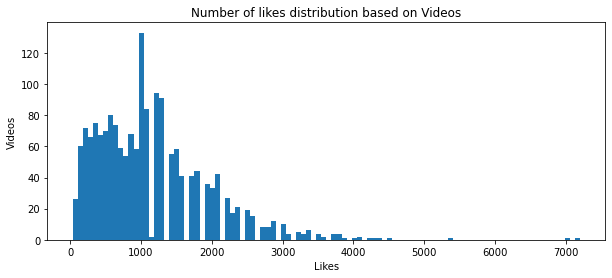

In [30]:
fig ,ax = plt.subplots(figsize = (10,4))

ax.hist(df['likes'], bins = 100)

plt.title('Number of likes distribution based on Videos')

plt.xlabel('Likes')
plt.ylabel('Videos')

plt.show()

#### 2. Analysing - Views

In [31]:
print("Minimum : ", min(df['views']))
print("Maximum : ", max(df['views']))
print("Average : ", int(df['views'].mean()))

Minimum :  5699
Maximum :  99997
Average :  56947


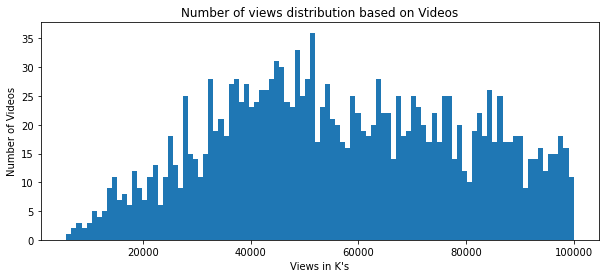

In [32]:
fig ,ax = plt.subplots(figsize = (10,4))

ax.hist(df['views'], bins = 100)

plt.title('Number of views distribution based on Videos')

plt.xlabel("Views in K's")
plt.ylabel('Number of Videos')

plt.show()

#### 3. Analysing - Comments

In [33]:
print("Minimum : ", min(df['comments']))
print("Maximum : ", max(df['comments']))
print("Average : ", int(df['comments'].mean()))

Minimum :  2
Maximum :  2014
Average :  155


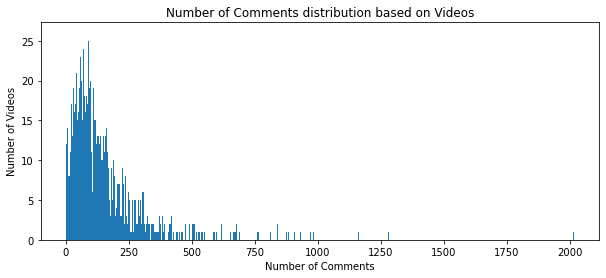

In [34]:
fig ,ax = plt.subplots(figsize = (10,4))

ax.hist(df['comments'], bins = 1000)

plt.title('Number of Comments distribution based on Videos')

plt.xlabel('Number of Comments')
plt.ylabel('Number of Videos')

plt.show()

#### 4. Finding Correlation from Scratch

In [35]:
factor = []

for i in df.values:    
    factor.append(round(i[3]/i[2],5))          # i[2] = Views, i[3] = likes
    
df['view_to_like'] = factor

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_like
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.03137
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.01387


In [36]:
print("Minimum : ", min(df['view_to_like']))
print("Maximum : ", max(df['view_to_like']))

print(df['view_to_like'].mode())

Minimum :  0.00162
Maximum :  0.07977
0    0.01388
dtype: float64


#### 5. Adding Predicted Likes Column

In [37]:
likes = []

for i in df['views']:
    likes.append(int(i * .01388))
    
df['pred_likes'] = likes

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_like,pred_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706,711
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387,355
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954,297
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.03137,530
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.01387,449


## Ploting Correlation

#### 6. Correlation b/w Likes and Views

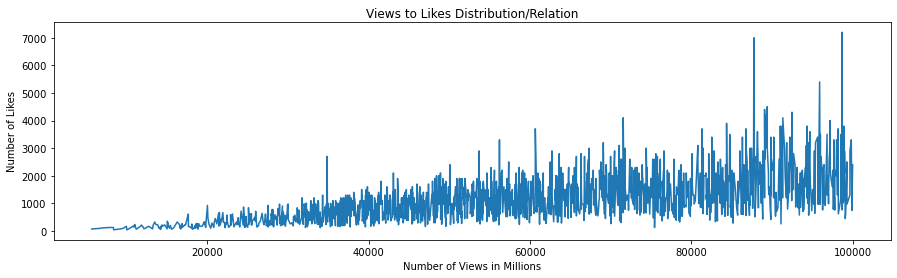

In [38]:
data = []

for i in df.values:
    data.append([i[2],i[3]])
    
df_ = pd.DataFrame(data, columns = ['views','likes'])

views = list(df_.sort_values(by = 'views')['views'])
likes = list(df_.sort_values(by = 'views')['likes'])

fig, ax = plt.subplots(figsize = (15,4))

ax.plot(views,likes)

plt.xlabel("Number of Views in Millions")
plt.ylabel('Number of Likes')

plt.title('Views to Likes Distribution/Relation')

plt.show()

### Conclusion : There is very positive Correlation between Likes and Views

### 7. Correlation b/w Views to Day

#### 7.1) Total Views in all the video on Day Basis

<AxesSubplot:xlabel='day'>

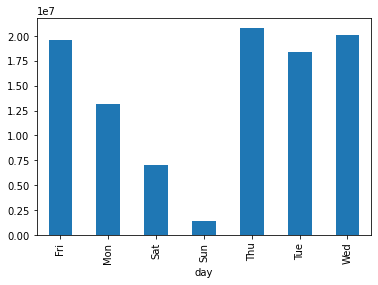

In [39]:
df.groupby('day').sum()['views'].plot(kind = 'bar')

#### 7.2) Total number of video uploaded on Day Basis

<AxesSubplot:xlabel='day'>

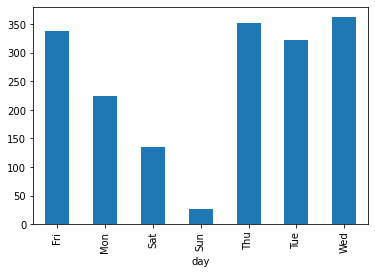

In [40]:
df.groupby('day').size().plot(kind = 'bar')

#### 7.3) Average Number of Views in all the video on Day Basis

<AxesSubplot:xlabel='day'>

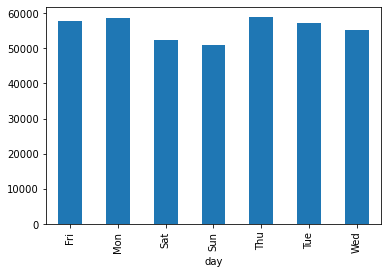

In [41]:
df.groupby('day').mean()['views'].plot(kind = 'bar')

#### 8. Correlation b/w Views & [Likes, Predicted Likes]

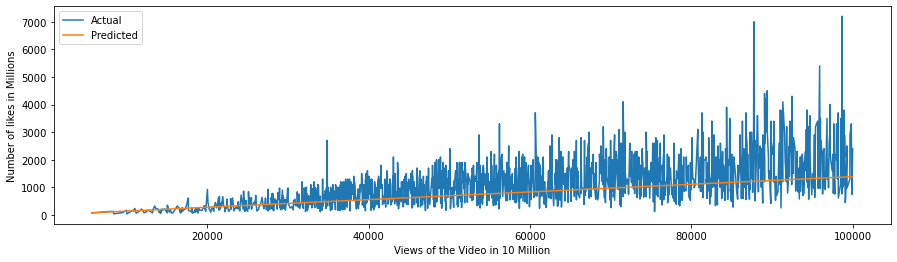

In [42]:
data = []

for i in df.values:
    
    data.append([i[2],i[3],i[10]])

    
df_ = pd.DataFrame(data, columns = ['views','likes','pred_likes'])

views  = list(df_.sort_values(by = 'views')['views'])
likes  = list(df_.sort_values(by = 'views')['likes'])
likes_ = list(df_.sort_values(by = 'views')['pred_likes'])

fig, ax = plt.subplots(figsize = (15,4))

plt.plot(views,likes , label = 'Actual')
plt.plot(views,likes_, label = 'Predicted')

plt.legend()

plt.xlabel('Views of the Video in 10 Million')
plt.ylabel('Number of likes in Millions')

plt.show()

In [43]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_like,pred_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706,711
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387,355
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954,297
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.03137,530
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.01387,449


## 9. Finding Loss Using MSE

#### 9.1) Finding M-Error

In [44]:
total_error = []

for i in df.values:
    
    t = i[3]-i[10]
    
    if (t >= 0):
        total_error.append(t)
    else:
        total_error.append(-t)
        
sum(total_error)/len(total_error)


502.6967120181406

#### 9.2) Finding View to Like Ratio

In [45]:
view_to_like = []

for i in df.values:    
    view_to_like.append(round(i[3]/i[2],5))
    
df['view_to_like'] = view_to_like

st  = int(df['view_to_like'].min() * 100000)
end = int(df['view_to_like'].max() * 100000)

factors = []

for i in range(st,end + 1 , 1):
    factors.append(i/100000)

#### 9.3) Predicting Likes for Specific Factor

In [46]:
likes_ = []

for i in df['views']: 
    likes_.append(int(i * .01388))

### 10. Combining Factor + Error + Ratios

In [47]:
likes = np.array(df['likes'])

error = []

for i in tqdm(range(st,end + 1 , 1)):        # Creating Start and Ending Reage for Factors
    factor = i/100000                       
    
    likes_ = []
    
    for i in df['views']:                    # Predicting Likes for Specific Factor     
        likes_.append(int(factor * i))

    likes_ = np.array(likes_) 
    
    total_error = []                         
    
    for i in range(len(likes)):              # Erros for Actual Like to Predicted Like for One Factor
        l = likes[i] - likes_[i]
        if (l >= 0):                         # Finding Modulo
            total_error.append(l)
        else:
            total_error.append(-l)
    
    total_error = np.array(total_error)    
    
    error.append([factor, int(total_error.mean())])     # Finding Error for Specific Factor
    
error = pd.DataFrame(error, columns = ['Factor','Error'])

100%|██████████████████████████████████████| 7815/7815 [00:10<00:00, 759.72it/s]


In [48]:
error.head()

,Factor,Error
0,0.00162,1039
1,0.00163,1039
2,0.00164,1038
3,0.00165,1038
4,0.00166,1037


#### Finding Best Factor that Fits the Likes and Views

In [49]:
final_factor = error.sort_values(by = 'Error').head(10)['Factor'].mean()

In [50]:
final_factor

0.019152999999999996

In [51]:
likes_ = []

for i in df['views']:
    likes_.append(int(i * final_factor))
    
df['pred_likes'] = likes_

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_like,pred_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706,982
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387,490
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954,410
5,7,Ukraine's Fight to Keep Educating Its Children...,38252,1200,225,14,4,2022,Thu,0.03137,732
6,8,Why Entrepreneurship Flourishes in The Country...,32369,449,95,14,4,2022,Thu,0.01387,619


### Actual to Predicted Likes with best Fit Factor

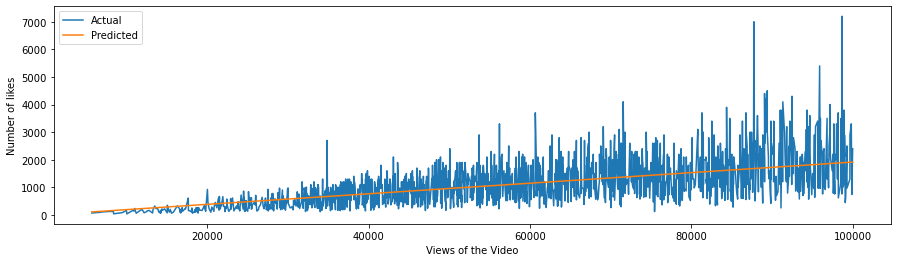

In [52]:
data = []

for i in df.values:
    
    data.append([i[2],i[3],i[10]])

    
df_ = pd.DataFrame(data, columns = ['views','likes','pred_likes'])

views  = list(df_.sort_values(by = 'views')['views'])
likes  = list(df_.sort_values(by = 'views')['likes'])
likes_ = list(df_.sort_values(by = 'views')['pred_likes'])

fig, ax = plt.subplots(figsize = (15,4))

plt.plot(views,likes , label = 'Actual')
plt.plot(views,likes_, label = 'Predicted')

plt.legend()

plt.xlabel('Views of the Video')
plt.ylabel('Number of likes')

plt.show()

In [53]:
factor

0.07976